<a href="https://colab.research.google.com/github/SamaSamrin/Data-Cleaning-with-Python/blob/main/Cleaning_very_dirty_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and connecting to Google Drive for datasets

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Getting the files

In [26]:
df = pd.read_csv('/content/drive/MyDrive/0 Codes 2025/Datasets/animal_data_dirty.csv', sep=';')
# we are using sep=';' because the values and columns in the data file are separated by semicolons instead of commas

df

,Animal type,Country,Weight kg,Body Length cm,Gender,Animal code,Latitude,Longitude,Animal name,Observation date,Data compiled by
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03.01.2024,James Johnson
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03.02.2024,James Johnson
2,European bison,Poland,930.000,335.0,male,NaN,52.828845,23.820144,Szefu,01.03.2024,Anne Anthony
3,European bison,Poland,909.000,311.0,not determined,NaN,52.830509,23.826849,NaN,01.03.2024,Anne Anthony
4,European bison™,Poland,581.000,277.0,female,NaN,52.834109,23.807093,NaN,01.03.2024,Anne Anthony
...,...,...,...,...,...,...,...,...,...,...,...
1006,red squirrel,Poland,0.346,20.0,female,NaN,52.212001,21.033187,Lola,7 May 2024,Anne Anthony
1007,hedgehog,Germany,1.000,23.0,female,NaN,49.561356,11.105334,NaN,7 May 2024,Bob Bobson
1008,hedgehog,Germany,0.500,17.0,female,NaN,49.561569,11.087046,NaN,7 May 2024,Bob Bobson
1009,red squirrel,Poland,0.346,20.0,female,NaN,52.212001,21.033187,Lola,7 May 2024,Anne Anthony


# Exploring the dataset

In [10]:
df.columns

Index(['Animal type', 'Country', 'Weight kg', 'Body Length cm', 'Gender',
       'Latitude', 'Longitude', 'Animal name', 'Observation date',
       'Data compiled by'],
      dtype='object')

In [7]:
df.describe()

,Weight kg,Body Length cm,Animal code,Latitude,Longitude
count,984.000000,984.000000,0.0,913.000000,913.000000
mean,39.745503,39.107724,NaN,49.393369,18.203280
std,156.290076,58.628601,NaN,7.168900,3.899601
min,-0.252000,-19.000000,NaN,-78.582973,11.074008
25%,0.293000,19.000000,NaN,48.186913,14.384559
50%,0.331500,21.000000,NaN,49.560723,18.944015
75%,0.800000,23.000000,NaN,52.212433,21.033243
max,1100.000000,350.000000,NaN,52.853843,34.896734


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Animal type       991 non-null    object 
 1   Country           999 non-null    object 
 2   Weight kg         984 non-null    float64
 3   Body Length cm    984 non-null    float64
 4   Gender            992 non-null    object 
 5   Animal code       0 non-null      float64
 6   Latitude          913 non-null    float64
 7   Longitude         913 non-null    float64
 8   Animal name       52 non-null     object 
 9   Observation date  1011 non-null   object 
 10  Data compiled by  1011 non-null   object 
dtypes: float64(5), object(6)
memory usage: 87.0+ KB


***Observation*** : Animal Code column has only null values, which means no values, which means we need to get rid of it

Which animals are in this dataset?

In [16]:
df['Animal type'].unique().tolist()

[nan,
 'European bison',
 'European bison™',
 'European bisson',
 'European buster',
 'lynx',
 'lynx?',
 'red squirel',
 'red squirrel',
 'red squirrell',
 'hedgehog',
 'wedgehod',
 'ledgehod']

***Observation*** : The same animal appears with different spelling errors or unwanted characters. They all need to be cleaned into consistent non-redundant formats

# Get rid of Animal Code column because all of its values are NULL

In [27]:
df = df.drop(columns='Animal code')

df

,Animal type,Country,Weight kg,Body Length cm,Gender,Latitude,Longitude,Animal name,Observation date,Data compiled by
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03.01.2024,James Johnson
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03.02.2024,James Johnson
2,European bison,Poland,930.000,335.0,male,52.828845,23.820144,Szefu,01.03.2024,Anne Anthony
3,European bison,Poland,909.000,311.0,not determined,52.830509,23.826849,NaN,01.03.2024,Anne Anthony
4,European bison™,Poland,581.000,277.0,female,52.834109,23.807093,NaN,01.03.2024,Anne Anthony
...,...,...,...,...,...,...,...,...,...,...
1006,red squirrel,Poland,0.346,20.0,female,52.212001,21.033187,Lola,7 May 2024,Anne Anthony
1007,hedgehog,Germany,1.000,23.0,female,49.561356,11.105334,NaN,7 May 2024,Bob Bobson
1008,hedgehog,Germany,0.500,17.0,female,49.561569,11.087046,NaN,7 May 2024,Bob Bobson
1009,red squirrel,Poland,0.346,20.0,female,52.212001,21.033187,Lola,7 May 2024,Anne Anthony


# **Fixing the string/text columns first**

In [45]:
df.select_dtypes(include=object).columns

Index(['Animal type', 'Country', 'Gender', 'Animal name', 'Observation date',
       'Data compiled by'],
      dtype='object')

# Fixing Animal Type column

In [17]:
df['Animal type'].unique().tolist()

[nan,
 'European bison',
 'European bison™',
 'European bisson',
 'European buster',
 'lynx',
 'lynx?',
 'red squirel',
 'red squirrel',
 'red squirrell',
 'hedgehog',
 'wedgehod',
 'ledgehod']

Removing unwanted characters

In [28]:
df['Animal type'] = df['Animal type'].str.rstrip('?™')

df['Animal type'].unique().tolist()

[nan,
 'European bison',
 'European bisson',
 'European buster',
 'lynx',
 'red squirel',
 'red squirrel',
 'red squirrell',
 'hedgehog',
 'wedgehod',
 'ledgehod']

Fixing spelling errors

In [34]:
df['Animal type'] = df['Animal type'].replace({'European bisson' : 'European bison',
                                                   'European buster' : 'European bison',
                                                   'red squirel' : 'red squirrel',
                                                   'red squirrell' : 'red squirrel',
                                                   'wedgehod' : 'hedgehog',
                                                   'ledgehod' : 'hedgehog',
                                                   'nan' : 'unknown'})

In [35]:
df['Animal type'].unique().tolist()

[nan, 'European bison', 'lynx', 'red squirrel', 'hedgehog']

In [36]:
df['Animal type'] = df['Animal type'].fillna('unknown')

In [37]:
df['Animal type'].unique().tolist()

['unknown', 'European bison', 'lynx', 'red squirrel', 'hedgehog']

checking the result

In [38]:
df

,Animal type,Country,Weight kg,Body Length cm,Gender,Latitude,Longitude,Animal name,Observation date,Data compiled by
0,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03.01.2024,James Johnson
1,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03.02.2024,James Johnson
2,European bison,Poland,930.000,335.0,male,52.828845,23.820144,Szefu,01.03.2024,Anne Anthony
3,European bison,Poland,909.000,311.0,not determined,52.830509,23.826849,NaN,01.03.2024,Anne Anthony
4,European bison,Poland,581.000,277.0,female,52.834109,23.807093,NaN,01.03.2024,Anne Anthony
...,...,...,...,...,...,...,...,...,...,...
1006,red squirrel,Poland,0.346,20.0,female,52.212001,21.033187,Lola,7 May 2024,Anne Anthony
1007,hedgehog,Germany,1.000,23.0,female,49.561356,11.105334,NaN,7 May 2024,Bob Bobson
1008,hedgehog,Germany,0.500,17.0,female,49.561569,11.087046,NaN,7 May 2024,Bob Bobson
1009,red squirrel,Poland,0.346,20.0,female,52.212001,21.033187,Lola,7 May 2024,Anne Anthony


# Fixing Country column

In [39]:
df['Country'].unique().tolist()

[nan,
 'Poland',
 'Hungary',
 'PL',
 'Germany',
 'Slovakia',
 'Czech Republic',
 'Czech',
 'Hungry',
 'HU',
 'Austria',
 'Australia',
 'CZ',
 'DE',
 'CC']

filling the null values first

In [40]:
df['Country'] = df['Country'].fillna('unknown')

df['Country'].unique().tolist()

['unknown',
 'Poland',
 'Hungary',
 'PL',
 'Germany',
 'Slovakia',
 'Czech Republic',
 'Czech',
 'Hungry',
 'HU',
 'Austria',
 'Australia',
 'CZ',
 'DE',
 'CC']

making the values consistent

In [41]:
df['Country'] = df['Country'].replace({'PL' : 'Poland',
                                       'DE' : 'Germany',
                                       'HU' : 'Hungary',
                                       'CZ' : 'Czech Republic',
                                       'Czech' : 'Czech Republic',
                                       'CC' : 'Cocos Island'})

In [42]:
df['Country'].unique().tolist()

['unknown',
 'Poland',
 'Hungary',
 'Germany',
 'Slovakia',
 'Czech Republic',
 'Hungry',
 'Austria',
 'Australia',
 'Cocos Island']

checking results

In [43]:
df

,Animal type,Country,Weight kg,Body Length cm,Gender,Latitude,Longitude,Animal name,Observation date,Data compiled by
0,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,03.01.2024,James Johnson
1,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,03.02.2024,James Johnson
2,European bison,Poland,930.000,335.0,male,52.828845,23.820144,Szefu,01.03.2024,Anne Anthony
3,European bison,Poland,909.000,311.0,not determined,52.830509,23.826849,NaN,01.03.2024,Anne Anthony
4,European bison,Poland,581.000,277.0,female,52.834109,23.807093,NaN,01.03.2024,Anne Anthony
...,...,...,...,...,...,...,...,...,...,...
1006,red squirrel,Poland,0.346,20.0,female,52.212001,21.033187,Lola,7 May 2024,Anne Anthony
1007,hedgehog,Germany,1.000,23.0,female,49.561356,11.105334,NaN,7 May 2024,Bob Bobson
1008,hedgehog,Germany,0.500,17.0,female,49.561569,11.087046,NaN,7 May 2024,Bob Bobson
1009,red squirrel,Poland,0.346,20.0,female,52.212001,21.033187,Lola,7 May 2024,Anne Anthony


# Fixing Gender column


In [46]:
df['Gender'].unique().tolist()

[nan, 'male', 'not determined', 'female']

In [47]:
df['Gender'] = df['Gender'].fillna('unknown')

In [48]:
df['Gender'].unique().tolist()

['unknown', 'male', 'not determined', 'female']

In [50]:
df['Gender'] = df['Gender'].replace({'not determined' : 'unknown'})

In [51]:
df['Gender'].unique().tolist()

['unknown', 'male', 'female']

In [52]:
df

,Animal type,Country,Weight kg,Body Length cm,Gender,Latitude,Longitude,Animal name,Observation date,Data compiled by
0,unknown,unknown,NaN,NaN,unknown,NaN,NaN,NaN,03.01.2024,James Johnson
1,unknown,unknown,NaN,NaN,unknown,NaN,NaN,NaN,03.02.2024,James Johnson
2,European bison,Poland,930.000,335.0,male,52.828845,23.820144,Szefu,01.03.2024,Anne Anthony
3,European bison,Poland,909.000,311.0,unknown,52.830509,23.826849,NaN,01.03.2024,Anne Anthony
4,European bison,Poland,581.000,277.0,female,52.834109,23.807093,NaN,01.03.2024,Anne Anthony
...,...,...,...,...,...,...,...,...,...,...
1006,red squirrel,Poland,0.346,20.0,female,52.212001,21.033187,Lola,7 May 2024,Anne Anthony
1007,hedgehog,Germany,1.000,23.0,female,49.561356,11.105334,NaN,7 May 2024,Bob Bobson
1008,hedgehog,Germany,0.500,17.0,female,49.561569,11.087046,NaN,7 May 2024,Bob Bobson
1009,red squirrel,Poland,0.346,20.0,female,52.212001,21.033187,Lola,7 May 2024,Anne Anthony


seeing the distribution through a pie chart


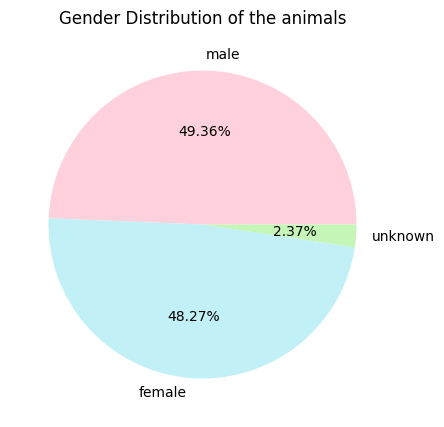

In [68]:
pastel_colors = ['#ffd1dc', '#c1f0f6', '#c6f5b8', '#fff5ba', '#f0d8ff']
vibrant_colors = ['#ff6f61', '#6b5b95', '#88b04b', '#f7cac9', '#92a8d1']
neutral_colors = ['#d9d9d9', '#b3b3b3', '#999999', '#7f7f7f', '#666666']

df['Gender'].value_counts().plot.pie(
    autopct='%1.2f%%',
    figsize=(5,5),
    colors=pastel_colors,
    title="Gender Distribution of the animals"
)


plt.ylabel('')
plt.show()

# Fixing Animal name column

# Fixing Observation Date column

# Fixing Data compiled by column